In [1]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate synthetic features
data = {
    "Temperature": np.round(np.random.normal(loc=25, scale=5, size=n_samples), 2),
    "Humidity": np.round(np.random.normal(loc=60, scale=10, size=n_samples), 2),
    "WindSpeed": np.round(np.random.normal(loc=10, scale=3, size=n_samples), 2),
    "Rainfall": np.round(np.abs(np.random.normal(loc=5, scale=8, size=n_samples)), 2),
    "SunshineHours": np.round(np.random.normal(loc=7, scale=2, size=n_samples), 2),
    "Pressure": np.round(np.random.normal(loc=1013, scale=10, size=n_samples), 2),
    "SoilMoisture": np.round(np.random.normal(loc=30, scale=5, size=n_samples), 2),
    "AirQuality": np.round(np.random.normal(loc=40, scale=15, size=n_samples), 2),
    "CO2Level": np.round(np.random.normal(loc=400, scale=30, size=n_samples), 2),
    "NoiseLevel": np.round(np.random.normal(loc=60, scale=8, size=n_samples), 2),
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a target variable with some pattern + noise
df["PowerUsage"] = (
    0.4 * df["Temperature"]
    - 0.3 * df["Humidity"]
    + 0.2 * df["SunshineHours"]
    + 0.1 * df["CO2Level"]
    + np.random.normal(0, 5, size=n_samples)
).round(2)

# Save to CSV
df.to_csv("synthetic_10_column_environment_data.csv", index=False)

# Preview
print("✅ Dataset created and saved as 'synthetic_10_column_environment_data.csv'")
print(df.head()) 

✅ Dataset created and saved as 'synthetic_10_column_environment_data.csv'
   Temperature  Humidity  WindSpeed  Rainfall  SunshineHours  Pressure  \
0        27.48     73.99       7.97     10.26           5.27   1008.76   
1        24.31     69.25       9.57      1.88           6.94   1008.47   
2        28.24     60.60       7.62      1.69           7.04    995.04   
3        32.62     53.53       9.08     20.10           7.95   1009.70   
4        23.83     66.98       4.32      9.45           4.27   1020.33   

   SoilMoisture  AirQuality  CO2Level  NoiseLevel  PowerUsage  
0         24.43       51.78    399.01       66.12       26.36  
1         26.85       13.33    384.89       68.59       27.30  
2         25.29       50.72    394.83       63.99       31.02  
3         27.26       36.49    421.44       44.46       41.28  
4         28.93       50.61    438.34       58.76       40.11  


Degree 1 → Train MSE: 33.4982, Validation MSE: 31.3078
Degree 2 → Train MSE: 33.0162, Validation MSE: 32.4197
Degree 3 → Train MSE: 32.9575, Validation MSE: 32.2368
Degree 4 → Train MSE: 32.7681, Validation MSE: 31.7732
Degree 5 → Train MSE: 32.6504, Validation MSE: 35.6178
Degree 6 → Train MSE: 32.5724, Validation MSE: 50.6729
Degree 7 → Train MSE: 32.4604, Validation MSE: 32.1890
Degree 8 → Train MSE: 32.4913, Validation MSE: 32.1649
Degree 9 → Train MSE: 32.5031, Validation MSE: 31.9967
Degree 10 → Train MSE: 32.5496, Validation MSE: 38.9701


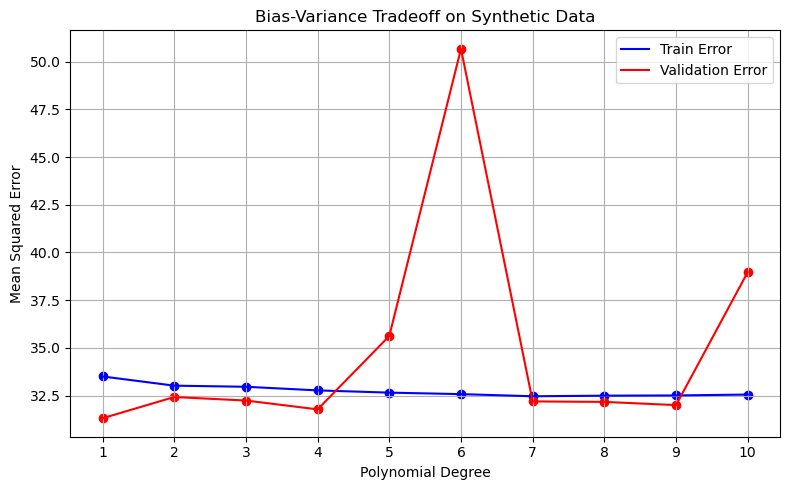

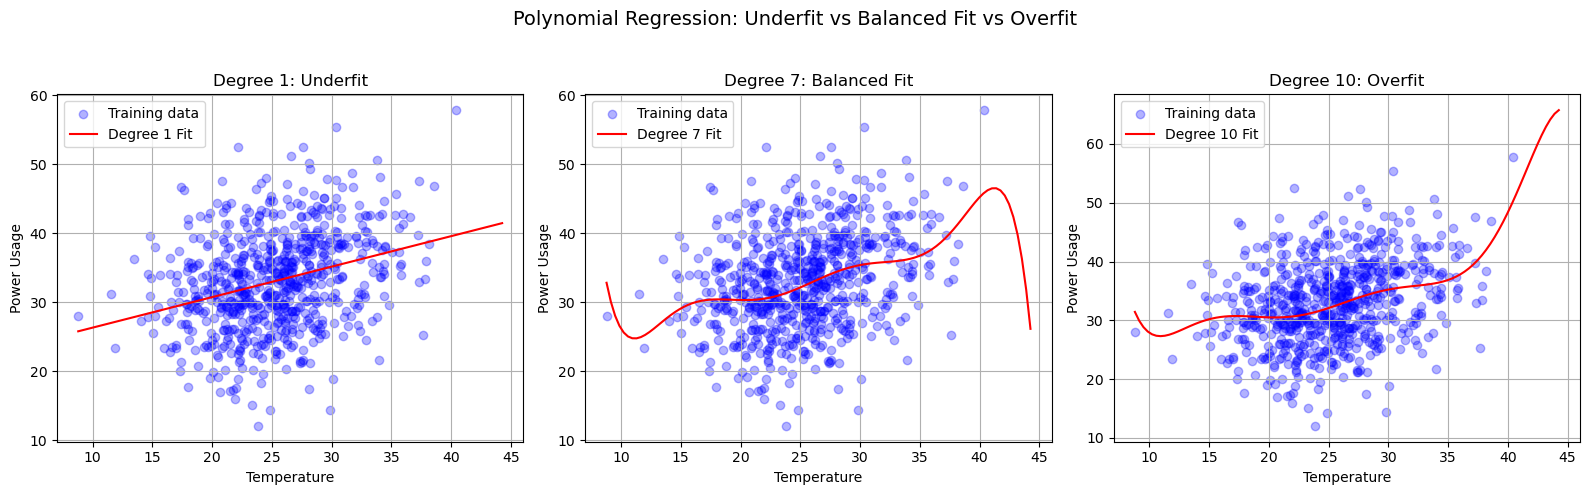

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# 1️⃣ Load synthetic dataset
df = pd.read_csv("synthetic_10_column_environment_data.csv")

# 2️⃣ Select two features for 2D analysis
X = df[['Temperature', 'CO2Level']].values
y = df['PowerUsage'].values

# 3️⃣ Split into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# 4️⃣ Bias-Variance Analysis
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_errors = []
valid_errors = []

for degree in degrees:
    # Polynomial feature expansion
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_valid_poly = poly.transform(X_valid)

    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_valid_pred = model.predict(X_valid_poly)

    # Compute MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    valid_mse = mean_squared_error(y_valid, y_valid_pred)

    train_errors.append(train_mse)
    valid_errors.append(valid_mse)

    print(f"Degree {degree} → Train MSE: {train_mse:.4f}, Validation MSE: {valid_mse:.4f}")

# 5️⃣ Plot Bias-Variance Tradeoff (scatter + line)
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors, color='blue', label='Train Error')
plt.plot(degrees, valid_errors, color='red', label='Validation Error')
plt.scatter(degrees, train_errors, color='blue')
plt.scatter(degrees, valid_errors, color='red')
plt.title("Bias-Variance Tradeoff on Synthetic Data")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6️⃣ Visualizing Polynomial Fits for Underfit, Balanced Fit, Overfit
# Fix CO2 level to its mean so we can visualize Temp vs PowerUsage
co2_fixed = np.mean(X[:, 1])
temp_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100).reshape(-1, 1)
co2_column = np.full_like(temp_range, co2_fixed)
X_curve = np.hstack([temp_range, co2_column])

# Choose example degrees based on earlier results
example_degrees = [1, 7, 10]  # Underfit, Balanced, Overfit
plt.figure(figsize=(16, 5))

for i, degree in enumerate(example_degrees):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_curve_poly = poly.transform(X_curve)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_curve = model.predict(X_curve_poly)

    plt.subplot(1, 3, i + 1)
    plt.scatter(X_train[:, 0], y_train, alpha=0.3, label="Training data", color='blue')
    plt.plot(temp_range, y_curve, label=f"Degree {degree} Fit", color='red')
    plt.xlabel("Temperature")
    plt.ylabel("Power Usage")
    plt.title(f"Degree {degree}: {'Underfit' if degree==1 else 'Overfit' if degree>8 else 'Balanced Fit'}")
    plt.legend()
    plt.grid(True)

plt.suptitle("Polynomial Regression: Underfit vs Balanced Fit vs Overfit", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [2]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


Degree  1 → Train MSE: 190.9307, Test MSE: 168.7986, Bias²: 257.7240, Variance: 80.9020
Degree  2 → Train MSE: 142.6855, Test MSE: 130.7980, Bias²: 258.1753, Variance: 127.9818
Degree  3 → Train MSE: 114.0116, Test MSE: 120.3009, Bias²: 258.8596, Variance: 158.9159
Degree  4 → Train MSE: 104.0996, Test MSE: 107.1467, Bias²: 258.5956, Variance: 168.1831
Degree  5 → Train MSE: 102.7214, Test MSE: 110.6515, Bias²: 258.1393, Variance: 176.3728
Degree  6 → Train MSE: 103.3789, Test MSE: 137.3757, Bias²: 257.9302, Variance: 203.2611
Degree  7 → Train MSE: 106.0694, Test MSE: 150.5715, Bias²: 258.2061, Variance: 200.9710
Degree  8 → Train MSE: 111.3112, Test MSE: 126.5365, Bias²: 257.9182, Variance: 171.6842
Degree  9 → Train MSE: 118.7847, Test MSE: 273.7964, Bias²: 257.8079, Variance: 314.2028


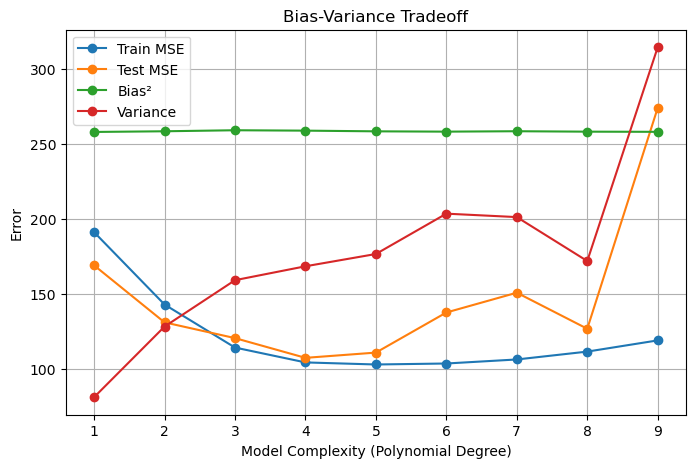

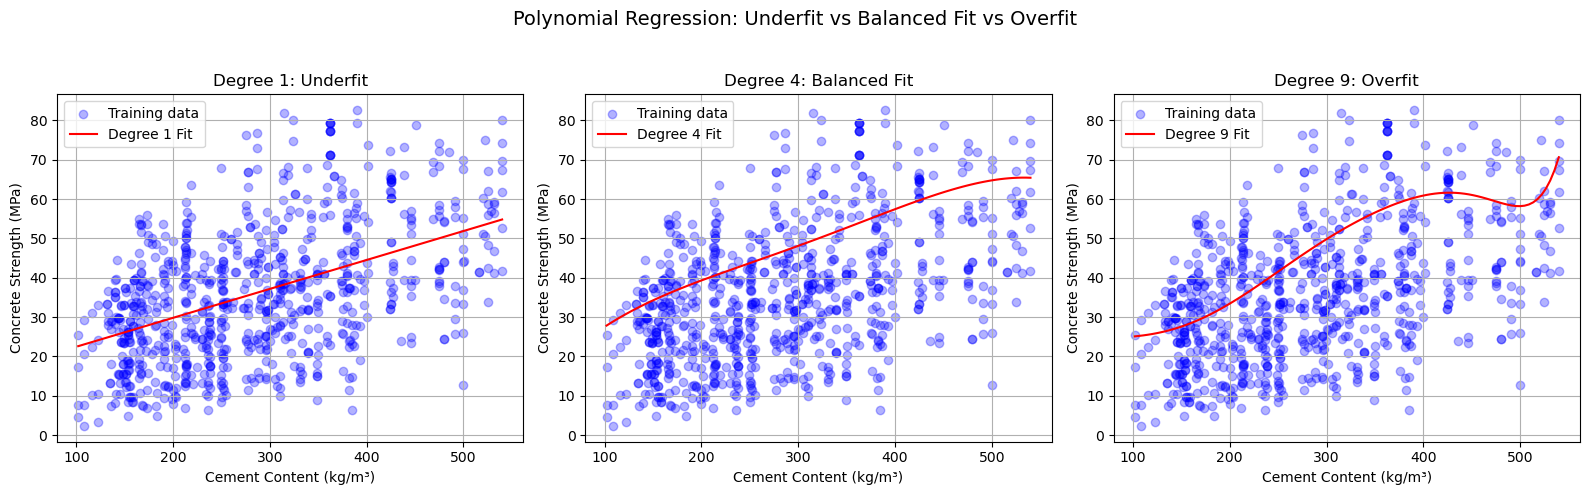

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1️⃣ Load dataset
df = pd.read_excel("Concrete_Data.xls")  # Change path if needed

# 2️⃣ Select features & target
X = df[["Cement (component 1)(kg in a m^3 mixture)", "Age (day)"]].values
y = df["Concrete compressive strength(MPa, megapascals) "].values  # note: space at end!

# 3️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store results
degrees = range(1, 10)
train_errors = []
test_errors = []
biases = []
variances = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    bias = np.mean((y_test - np.mean(y_test_pred)) ** 2)
    variance = np.var(y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)
    biases.append(bias)
    variances.append(variance)

    print(f"Degree {d:2d} → Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}, "
          f"Bias²: {bias:.4f}, Variance: {variance:.4f}")

# 4️⃣ Plot Bias-Variance Tradeoff
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors, label="Train MSE", marker='o')
plt.plot(degrees, test_errors, label="Test MSE", marker='o')
plt.plot(degrees, biases, label="Bias²", marker='o')
plt.plot(degrees, variances, label="Variance", marker='o')

plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Error")
plt.title("Bias-Variance Tradeoff")
plt.legend()
plt.grid(True)
plt.show()

# 5️⃣ Visualize Underfit vs Balanced Fit vs Overfit
example_degrees = [1, 4, 9]  # Underfit, Balanced, Overfit
cement_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
age_mean = np.full_like(cement_range, np.mean(X[:, 1]))
X_curve = np.column_stack((cement_range, age_mean))

plt.figure(figsize=(16, 5))
for i, degree in enumerate(example_degrees):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_curve_poly = poly.transform(X_curve)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_curve = model.predict(X_curve_poly)

    plt.subplot(1, 3, i + 1)
    plt.scatter(X_train[:, 0], y_train, alpha=0.3, label="Training data", color='blue')
    plt.plot(cement_range, y_curve, label=f"Degree {degree} Fit", color='red')
    plt.xlabel("Cement Content (kg/m³)")
    plt.ylabel("Concrete Strength (MPa)")
    if degree == 1:
        plt.title("Degree 1: Underfit")
    elif degree == 4:
        plt.title("Degree 4: Balanced Fit")
    else:
        plt.title("Degree 9: Overfit")
    plt.legend()
    plt.grid(True)

plt.suptitle("Polynomial Regression: Underfit vs Balanced Fit vs Overfit", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [3]:
import pandas as pd

df = pd.read_excel("Concrete_Data.xls", sheet_name="Sheet1")
print(df.columns.tolist())


['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)', 'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)', 'Concrete compressive strength(MPa, megapascals) ']
